In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [3]:
dados = pd.read_csv('Cities1.csv')
dados.head()

,City,Region,Country,AirQuality,WaterPollution
0,New York City,New York,United States of America,46.816038,49.504950
1,"Washington, D.C.",District of Columbia,United States of America,66.129032,49.107143
2,San Francisco,California,United States of America,60.514019,43.000000
3,Berlin,NaN,Germany,62.364130,28.612717
4,Los Angeles,California,United States of America,36.621622,61.299435


Gráfico de dispersão para 'AirQuality' vs 'WaterPollution'

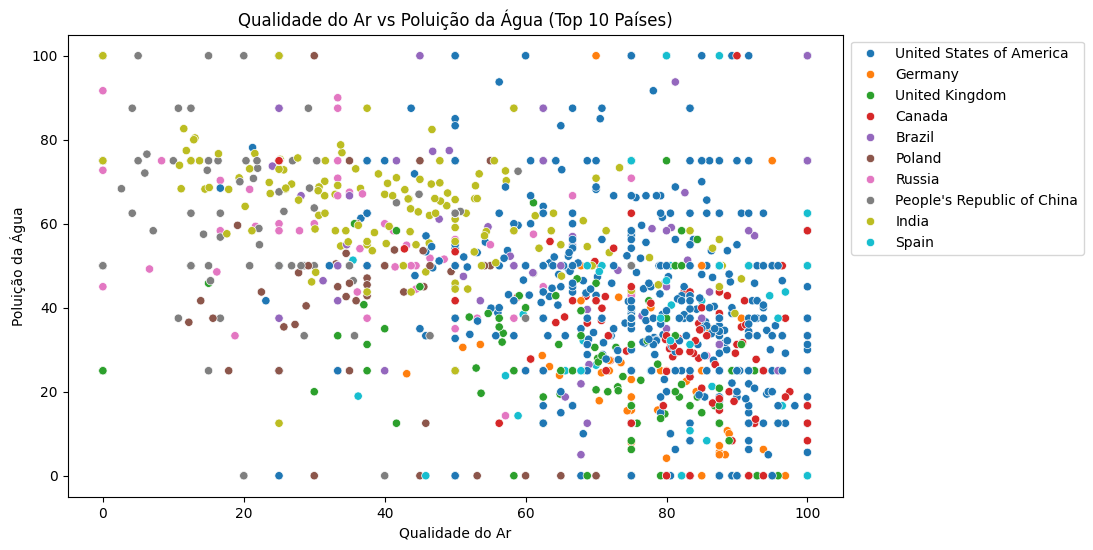

In [6]:
# Filtrando os top 10 países com base na contagem de cidades no dataset
top_countries = dados['Country'].value_counts().head(10).index

# Filtrando os dados para incluir apenas os top 10 países
top_countries_data = dados[dados['Country'].isin(top_countries)]

# Gráfico de dispersão para 'AirQuality' vs 'WaterPollution' para os top 10 países
plt.figure(figsize=(10, 6))
sns.scatterplot(data=top_countries_data, x='AirQuality', y='WaterPollution', hue='Country')
plt.title('Qualidade do Ar vs Poluição da Água (Top 10 Países)')
plt.xlabel('Qualidade do Ar')
plt.ylabel('Poluição da Água')
plt.legend(loc='upper right', bbox_to_anchor=(1.32, 1))
plt.show()
plt.show()

BoxPlot Poluição do ar por região (Top 10)

<Figure size 1400x700 with 0 Axes>

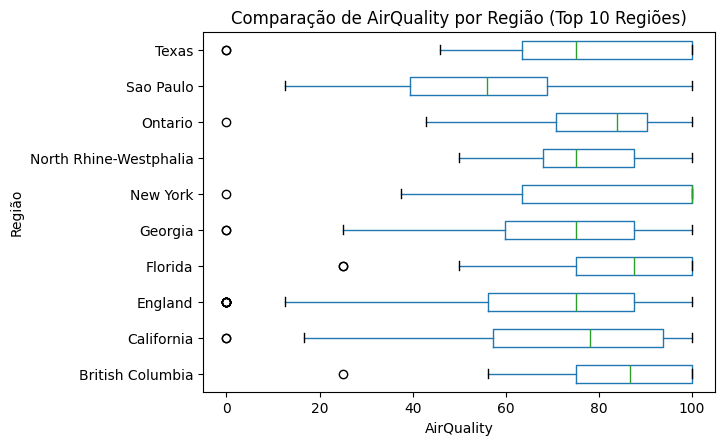

In [8]:
# Boxplot para comparar AirQuality por Região (usando apenas as 10 regiões mais frequentes para melhor visualização)
top_regions = dados['Region'].value_counts().index[:10]

plt.figure(figsize=(14, 7))
dados[dados['Region'].isin(top_regions)].boxplot(column='AirQuality', by='Region', grid=False, vert=False)
plt.title('Comparação de AirQuality por Região (Top 10 Regiões)')
plt.suptitle('')
plt.xlabel('AirQuality')
plt.ylabel('Região')
plt.show()

Gráfico média de poluição de água x ar por cidade

<Figure size 1400x700 with 0 Axes>

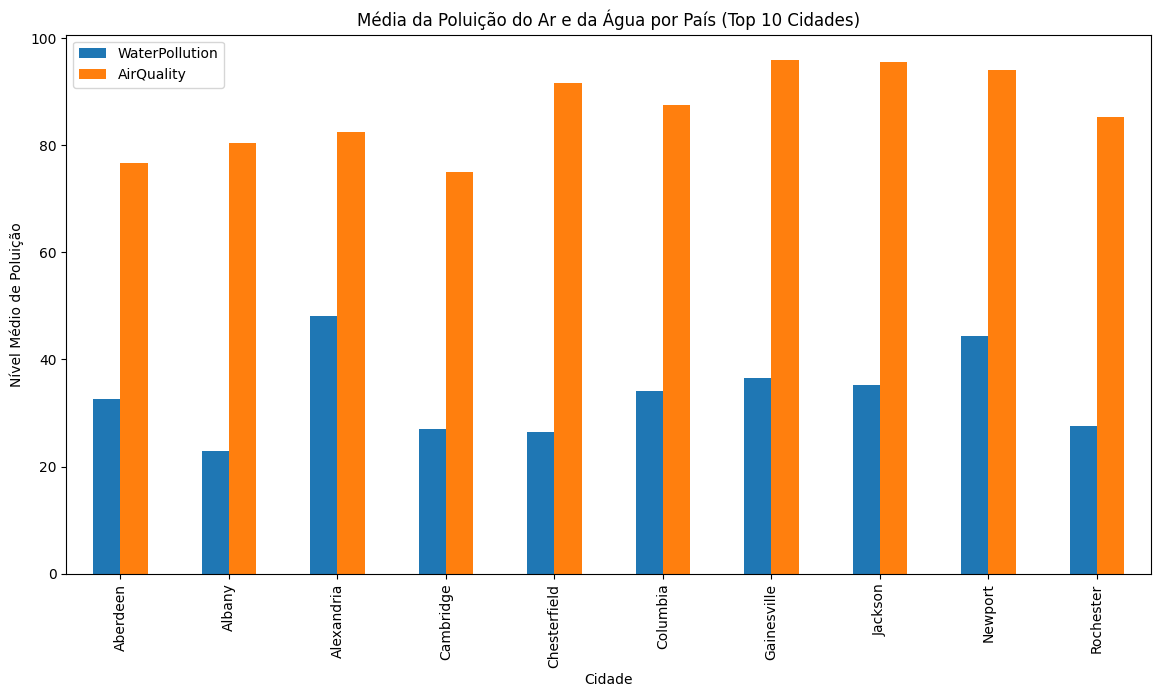

In [10]:
top_cities = dados['City'].value_counts().head(10).index
pollution_summary_top10 = dados[dados['City'].isin(top_cities)].groupby('City')[[ 'WaterPollution','AirQuality']].mean()

plt.figure(figsize=(14, 7))
pollution_summary_top10.plot(kind='bar', figsize=(14, 7))
plt.title('Média da Poluição do Ar e da Água por Cidade (Top 10 Cidades)')
plt.xlabel('Cidade')
plt.ylabel('Nível Médio de Poluição')
plt.show()

Mapa de calor da correlação das métricas

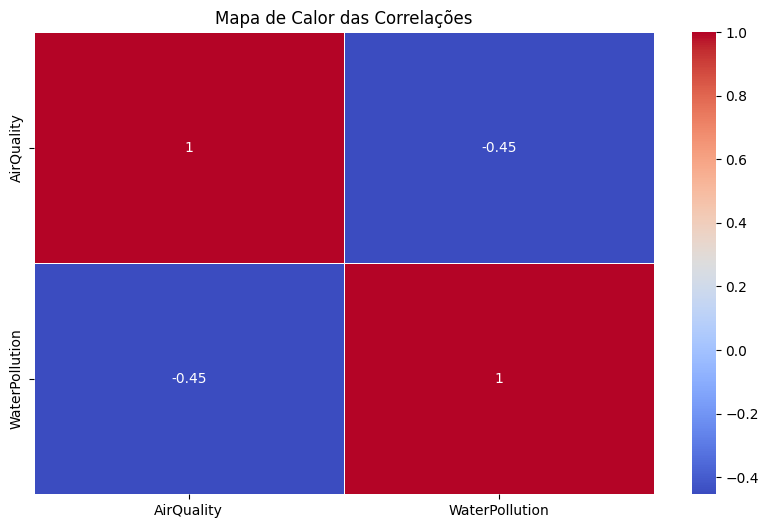

In [11]:
# Selecionar apenas colunas numéricas
numeric_data = dados.select_dtypes(include=['float64', 'int64'])

# Calcular a matriz de correlação
correlation_matrix = numeric_data.corr()

# Plotar o mapa de calor
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de Calor das Correlações')
plt.show()

Histograma poluição da água

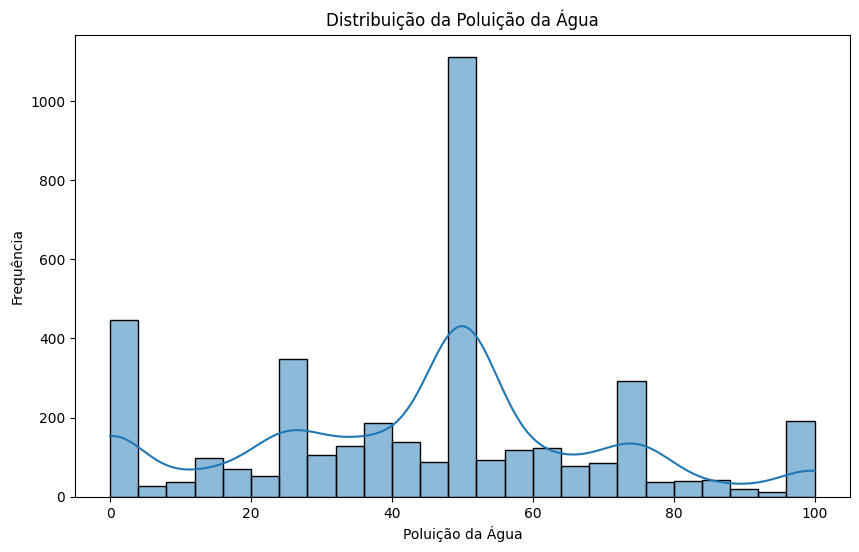

In [12]:
# Histograma para 'WaterPollution'
plt.figure(figsize=(10, 6))
sns.histplot(dados['WaterPollution'], kde=True)
plt.title('Distribuição da Poluição da Água')
plt.xlabel('Poluição da Água')
plt.ylabel('Frequência')
plt.show()

Histograma poluição do ar

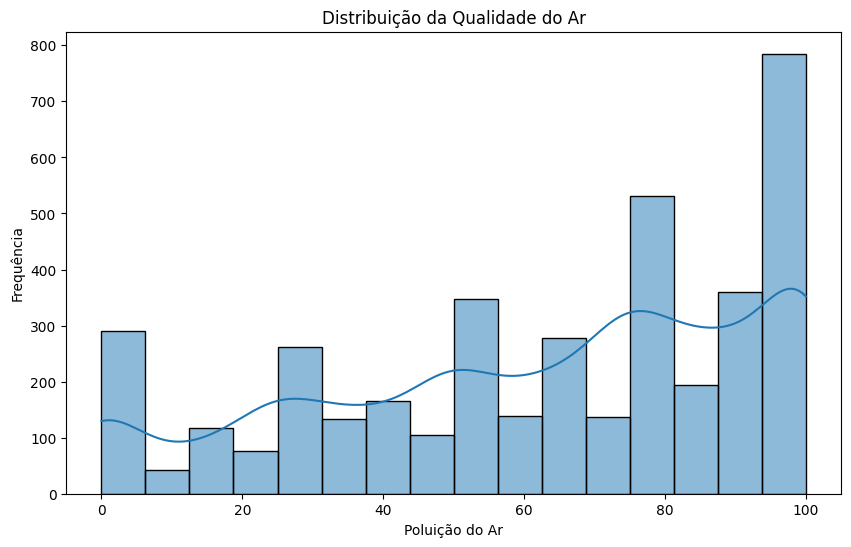

In [13]:
# Histograma para 'AirQuality'
plt.figure(figsize=(10, 6))
sns.histplot(dados['AirQuality'], kde=True)
plt.title('Distribuição da Qualidade do Ar')
plt.xlabel('Poluição do Ar')
plt.ylabel('Frequência')
plt.show()